# Simple Linear Regression

$y_i = \alpha x_i + \beta + \epsilon$

where $\epsilon$ is a Gaussian random variable with mean 0.

In [58]:
import sys
import subprocess

# implement pip as a subprocess:
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'numpy'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'scipy'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'ipywidgets'])
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# from matplotlib.widgets import Slider, Button
import ipywidgets as widgets;

In [69]:
n = 100

x = np.random.normal(5.5, 2, n)
alpha = np.random.gamma(1)
beta = np.random.uniform(0, 2)
Y = alpha*x + beta + np.random.normal(0, 1, n)
xy = np.array([x,Y]).T


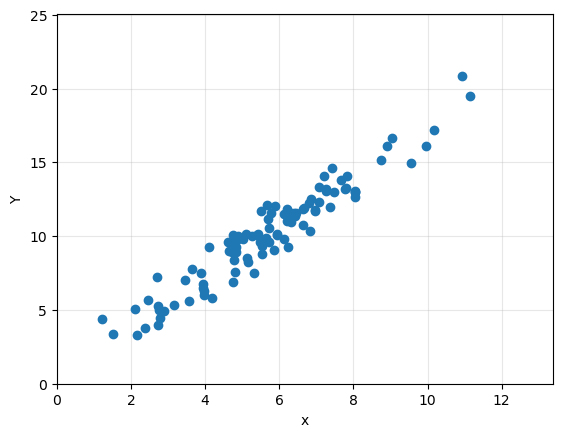

In [70]:
fig, ax1 = plt.subplots()

scatter_pts, = ax1.plot(xy[:,0], xy[:,1], lw=0, marker='o')
ax1.set_xlim(0, np.max(x)*1.2)
ax1.set_ylim(0, np.max(Y)*1.2)
ax1.set_xlabel('x')
ax1.set_ylabel('Y')
ax1.grid(True, alpha=0.3)

In [71]:
best_slope, best_intercept = 0, np.mean(Y)

def loss_function(x, Y, slope, intercept):
    return np.sum((Y - slope*x - intercept)**2)
    
def fit_by_hand(slope=0, intercept=np.mean(Y)):
    # Define initial parameters
    global best_slope, best_intercept
    init_s= np.mean(Y)
#     best_slope, best_intercept = slope, intercept

    # Create the figure and the line that we will manipulate
    fig, ax = plt.subplots()
    scatter_points = plt.plot(x, Y, lw=0, marker='o')
    line, = plt.plot(x, slope*x + intercept, color='red', label='Current fit')
    if loss_function(x, Y, slope, intercept) <= loss_function(x, Y, best_slope, best_intercept):
        best_slope, best_intercept = slope, intercept
        
    best_line, = plt.plot(x, best_slope*x + best_intercept, color='blue', label="Best fit so far")
    vlines = plt.vlines(x, Y, slope*x + intercept, alpha=0.3)
    ax.set_ylim(0, np.max(Y)*1.2)
    ax.set_xlim(0, np.max(x)*1.2)

    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('Y')
    ax.legend()
    plt.subplots_adjust(right=0.75)

    
    ax_text = plt.axes([0.76, 0.1, 0.22, 0.8])
    least_error_text = "Least error achieved: {:.2f}".format(loss_function(x, Y, best_slope, best_intercept))
    best_para_text = "Best (α, β) = ({0:.2f}, {1:.2f})".format(best_slope, best_intercept)
    ax_text.set_axis_off()
    curr_error = ax_text.text(0.0, 0.9, "Current error: {:.2f}".format(loss_function(x, Y, slope, intercept)))
    le_display = ax_text.text(0.0, 0.7, least_error_text, wrap=True)
    bp_display = ax_text.text(0.0, 0.5, best_para_text, wrap=True)

In [72]:
slope_slider = widgets.FloatSlider(min=-2.0, max=2.0, value=0.0, step=0.01, description=r"Slope α")
intercept_slider = widgets.FloatSlider(min=-np.max(Y), value=np.mean(Y),  max=np.max(Y), orientation='horizontal',  description=r"Intercept β")

widgets.interact(fit_by_hand,slope=slope_slider, intercept=intercept_slider)

interactive(children=(FloatSlider(value=0.0, description='Slope α', max=2.0, min=-2.0, step=0.01), FloatSlider…

<function __main__.fit_by_hand(slope=0, intercept=10.217598366207213)>